# Exercise 1 of PS703106
## Comparision of performance between sequential, oMP and oCL
## Group:
- Boutelhik Jonas
- Thöni Michael
- Urban Thomas

### Folders:
- for_csv: just have the output pip-able into a csv
- cleaner: cleaner implementation jet functionally equivalent
- non_quad: kernel implementation for non-quadratic input matrices (mxn times nxk = mxk)

### memory leakes:
When comparing the valgrind --leak-check outputs of the given vector-solution and our matrix multiplication programs, they were found to be identical. Further can stackoverflow-sources be named that trace the fault back to amd / intel opencl-implementations <b> thus our solution is memory leak free. </b> full reports can be read in valgrind_report_ocl.txt and valgrind_report_omp.txt.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

cpu1=pd.read_csv('stats_intel_i5_mat_mul_omp.csv') 
cpu1=cpu1.dropna(axis='columns')
gpu1=pd.read_csv('stats_gtx960_mat_mul_ocl.csv')
gpu1=cpu1.dropna(axis='columns')
cpu2=pd.read_csv('stats_phenom_x6_1075T_mat_mul_omp.csv')
cpu2=cpu2.dropna(axis='columns')
seq=pd.read_csv('stats_seq_phenom.csv')
seq=seq.dropna(axis='columns')
cpu1=cpu1.sort_values(by=['N'])
gpu1=gpu1.sort_values(by=['N'])
cpu2=cpu2.sort_values(by=['N'])
seq=seq.sort_values(by=['N'])
cpu1 = cpu1.assign(ID="intel_i5")
gpu1 = gpu1.assign(ID="gtx960")
cpu2 = cpu2.assign(ID="phenom_1075T")
seq = seq.assign(ID="phenom_seq")
both = pd.concat(( gpu1,cpu2,cpu1,seq))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



## Validity:
Here can be seen that every way of computing and with every problem size no invalid solutions turned up. (due to time restrictions was the size of N limited to ~ 4800)

In [2]:
both[' valid'].count()-len(both.index)

0

In [3]:
cpu2.groupby('N').mean().tail()

,time,valid,cores
N,,,
4200,226958.7438,1,6
4300,247925.4640,1,6
4400,280612.1726,1,6
4500,293106.4478,1,6
4600,325530.4630,1,6


In [4]:
gpu1.groupby('N').mean().tail()

,time,valid,cores
N,,,
2500,36465.3836,1,8
3000,65648.5490,1,8
3500,106142.9972,1,8
4000,165941.0842,1,8
4500,433607.0684,1,8


In [7]:
both.groupby('N').min()

,compute_units,cores,time,valid,ID
N,,,,,
10,1.0,6.0,0.003,1,gtx960
100,NaN,6.0,1.513,1,phenom_1075T
200,NaN,6.0,7.115,1,phenom_1075T
300,NaN,6.0,12.483,1,phenom_1075T
400,NaN,6.0,24.452,1,phenom_1075T
500,1.0,6.0,45.458,1,gtx960
600,NaN,6.0,66.196,1,phenom_1075T
700,NaN,6.0,110.713,1,phenom_1075T
800,NaN,6.0,445.743,1,phenom_1075T


### Performance:
Interesting points from these two graphs are as follows:
- My desktop cpu (phenom) consistently lost to both my gpu and my laptops cpu (on energy saver even!)
- the desktop cpu has the highest spread (admittedly with a per-point-sample-size of 5)
- gpu performance is underwhelming
- no suprise that working with 1 thread is the worst

N grew in 100 steps.

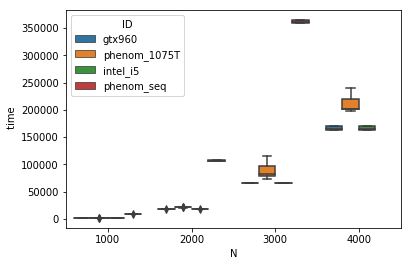

In [5]:


s=both[both['N']%1000==0]
g=sns.boxplot(x='N', y=' time', hue="ID", data=s)
#g.set_yscale('log')

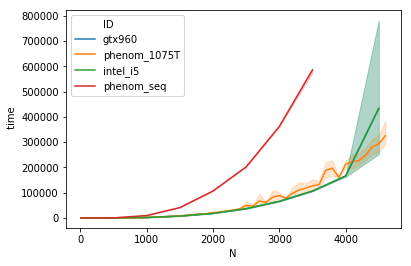

In [6]:
sns.lineplot(x='N', y=' time', hue="ID", data=both)

### Room for improvement (non-exhaustive list):
- use appropriate cache levels on the gpu
- split the workload on the gpu in a smarter way
- transpose one of the matrices